In [ ]:
# for array computations and loading data
import numpy as np

# for plotting graphs
import matplotlib.pyplot as plt

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#for file manipulation
import pandas as pd

## Importing The data

In [20]:
x = pd.read_csv("tvmarketing.csv")

# Converting data frame to numpy
x_train = x.to_numpy()


#splitting last column of x_train into y_train
y_train = x_train[:,-1]

#removing last row from x_train
x_train = x_train[:,0]

# Convert 1-D arrays into 2-D because the commands later will require it
x_train = np.expand_dims(x_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)

print(f"x_train(First 5 rows): {x_train[:5]}")
print(f"y_train(First 5 rows): {y_train[:5]}")

x_train(First 5 rows): [[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]]
y_train(First 5 rows): [[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]]


Text(0, 0.5, 'Sales')

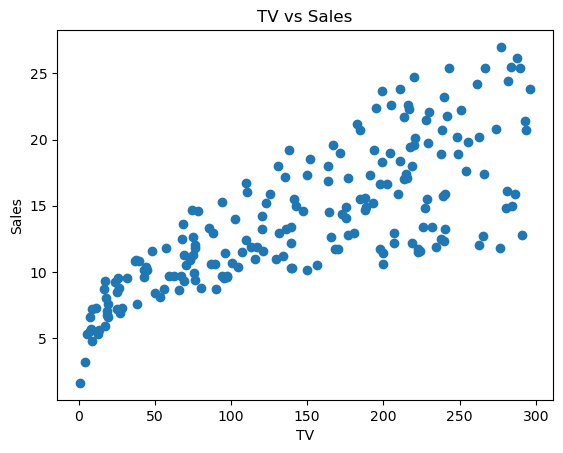

In [21]:
x = plt.scatter(x_train,y_train)
plt.title('TV vs Sales')
plt.xlabel("TV")
plt.ylabel("Sales")

# Splitting data into training, testing and cross-validation set

In [31]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x_train, y_train, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (72, 1)
the shape of the training set (target) is: (72, 1)

the shape of the cross validation set (input) is: (24, 1)
the shape of the cross validation set (target) is: (24, 1)

the shape of the test set (input) is: (24, 1)
the shape of the test set (target) is: (24, 1)


## Plotting the graph

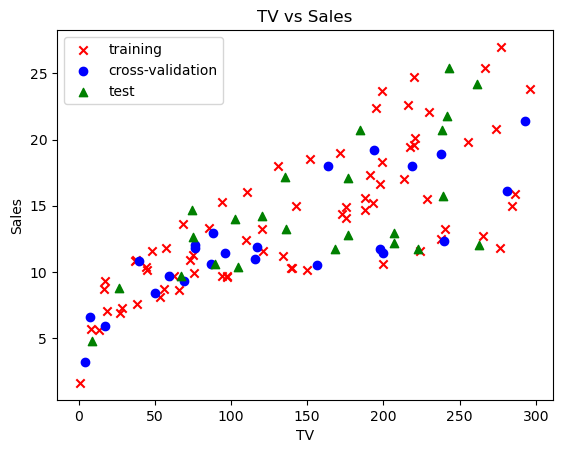

In [32]:
plt.scatter(x_train,y_train,marker='x',c='r',label='training')
plt.scatter(x_cv,y_cv,marker='o',c='b',label='cross-validation')
plt.scatter(x_test,y_test,marker='^',c='g',label='test')
plt.title('TV vs Sales')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()

## Now, I would be Scaling down my features in order to improve efficiency of algorithm

Computed mean of the training set: 142.84
Computed standard deviation of the training set: 85.16


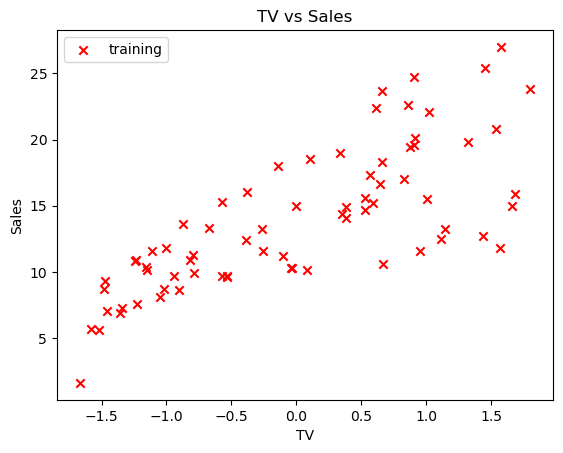

In [33]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
plt.scatter(x_train_scaled,y_train,marker='x',c='r',label='training')
plt.title('TV vs Sales')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()

## Training The Model

Now, we would be training our LinearRegression Model using Libraries

In [34]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train_scaled, y_train )

LinearRegression()

### Prediction using above model

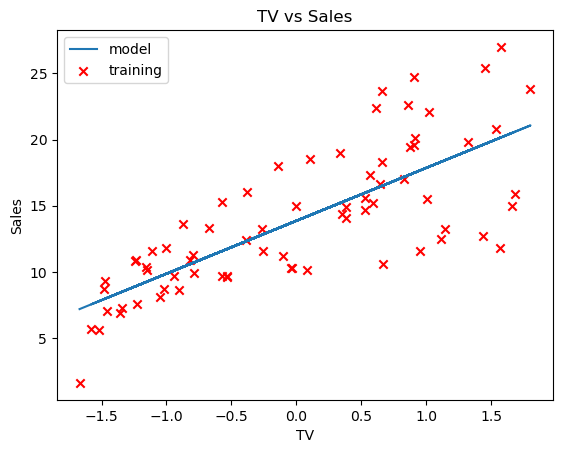

In [40]:
y_pred = linear_model.predict(x_train_scaled)
plt.plot(x_train_scaled,y_pred, label='model')
plt.scatter(x_train_scaled,y_train,marker='x',c='r',label='training')
plt.title('TV vs Sales')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()

Now, I would be evaluating our model on the basis of cost function and check whether i could maybe improve the model or not

### Evaluate our model

To evaluate the performance of your model, you will want to measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

Scikit-learn also has a built-in [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function that you can use. Take note though that [as per the documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), scikit-learn's implementation only divides by `m` and not `2*m` (where `m` = number of examples). Thus, to match the equation above, you can use the scikit-learn function then divide by two as shown below. We also included a for-loop implementation so you can check that it's equal. 

Another thing to take note: since you trained the model on scaled values (i.e. using the z-score), you should also feed in the scaled training set instead of its raw values.

In [41]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(x_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

#Note : We can also use loop to solve this instead of scikit learn, obviosuly.
# for-loop implementation
# total_squared_error = 0

# for i in range(len(yhat)):
#     squared_error_i  = (yhat[i] - y_train[i])**2
#     total_squared_error += squared_error_i                                              

# mse = total_squared_error / (2*len(yhat))


training MSE (using sklearn function): 5.823973262355016


In [42]:
# Scale the cross validation set using the mean and standard deviation of the training set
x_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(x_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 142.84
Standard deviation used to scale the CV set: 85.16
Cross validation MSE: 3.676091396160224


## Adding Polynomial Features

From the graphs earlier, you may have noticed that the target `y` rises more sharply at smaller values of `x` compared to higher ones. A straight line might not be the best choice because the target `y` seems to flatten out as `x` increases. Now that you have these values of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance. The code will mostly be the same but with a few extra preprocessing steps. Let's see that below.

### Create the additional features

First, you will generate the polynomial features from your training set. The code below demonstrates how to do this using the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class. It will create a new input feature which has the squared values of the input `x` (i.e. degree=2).

In [51]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
x_train_mapped = poly.fit_transform(x_train)

# printing how the new dataset looks with addition x^2 term
print(f"x_train_mapped: \n{x_train_mapped[:5]}")

x_train_mapped: 
[[2.134000e+02 4.553956e+04]
 [2.283000e+02 5.212089e+04]
 [1.954000e+02 3.818116e+04]
 [4.450000e+01 1.980250e+03]
 [1.976000e+02 3.904576e+04]]


#### Scaling our Polynomial Dataset

In [52]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(x_train_mapped_scaled[:5])

[[ 0.82855439  0.70511058]
 [ 1.00352253  0.96459384]
 [ 0.61718348  0.41498964]
 [-1.1548093  -1.01231004]
 [ 0.6430177   0.44907838]]


## Training the model again, using this new dataset

In [55]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(x_train_mapped_scaled, y_train )

LinearRegression()

### Plotting our new model onto the dataset

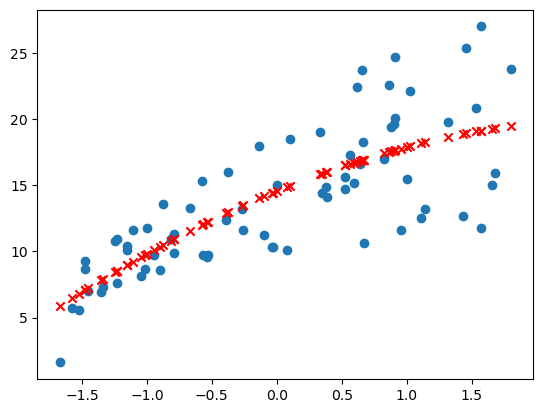

In [76]:
y_pred = model.predict(x_train_mapped_scaled)
plt.scatter(x_train_mapped_scaled[:,0], y_train)
plt.scatter(x_train_mapped_scaled[:,0],y_pred, c='r', marker='x')


In [56]:
# Compute the training MSE
yhat = model.predict(x_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
x_cv_mapped = poly.transform(x_cv)
 
# Scale the cross validation set using the mean and standard deviation of the training set
x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(x_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 5.632411422636405
Cross validation MSE: 3.540956368534834


## Trying to improve model by find correct degree curve to fit

We want to introduce more polynomial terms and see which one gives the best performance. As shown in class, you can have 10 different models like this:

<img src='images/C2_W3_poly.png' width=50%>

You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to degree=10. We'll plot it at the end to make it easier to compare the results for each model.

In [82]:
def plot_train_cv_mses(degrees, train_mses, cv_mses, title):
    degrees = range(1,11)
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs'); 
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs'); 
    plt.title(title)
    plt.xlabel("degree"); 
    plt.ylabel("MSE"); 
    plt.legend()
    plt.show()

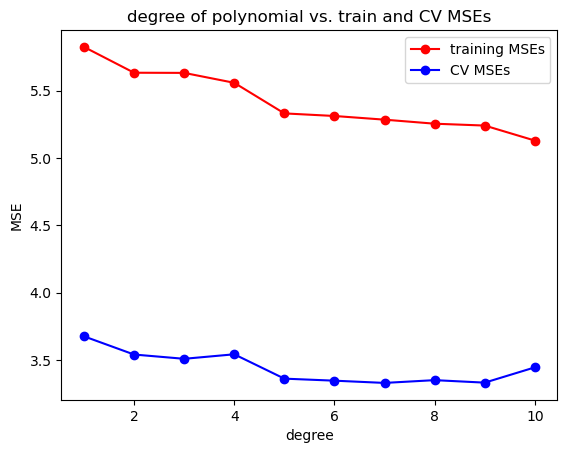

In [83]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    x_train_mapped_scaled = scaler_poly.fit_transform(x_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    x_cv_mapped = poly.fit_transform(x_cv)
    x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

In [84]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=7


You can then publish the generalization error by computing the test set's MSE. As usual, you should transform this data the same way you did with the training and cross validation sets.

In [85]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
x_test_mapped = poly.fit_transform(x_test)

# Scale the test set
x_test_mapped_scaled = scalers[degree-1].transform(x_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(x_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 5.28
Cross Validation MSE: 3.33
Test MSE: 6.96
